In [52]:
from moztelemetry import get_pings, get_pings_properties, get_one_ping_per_client, get_clients_history, get_records

In [21]:
%matplotlib inline
TITLE = "# of FXA_CONFIGURED events in Desktop - 10% - Fraction 0.001"
FRACTION = 0.001

In [22]:
import os
from datetime import date, timedelta, datetime
import pandas

today = date.today()
last_monday = today - timedelta(days=-today.weekday(), weeks=2)

WEEK_RANGE = pandas.date_range(end=last_monday, periods=5, freq='W-MON')
WEEKS = WEEK_RANGE.map(lambda x: x.strftime('%Y-%m-%d'))

OUT_DATA = []
VOLUME_DATA = []

for v in range(0, len(WEEKS)):
    VOLUME_DATA.append([0] * len(WEEKS))

for x in range(0, len(WEEKS)):
    OUT_DATA.append([0] * len(WEEKS))

In [29]:
WEEKLY_DATA = {}

for week in WEEK_RANGE:
    next_week = week + timedelta(weeks = 1)
    rng_start = week.strftime('%Y%m%d')
    rng_end = next_week.strftime('%Y%m%d')
    print rng_start
    print rng_end
    
    # Get the pings
    pings = get_pings(sc, app="Firefox", submission_date=(rng_start, rng_end), version=("43.0","45.0"), fraction=FRACTION)
    # Grab 10% of pings
    pings10 = pings.filter(lambda x: x["meta"].get("sampleId") < 10)
    # Get FxA pings
    subset = get_pings_properties(pings10, ["payload/histograms/FXA_CONFIGURED"])

    confd = subset.filter(lambda x: x['payload/histograms/FXA_CONFIGURED'] == True)
    confd_count = confd.count()
    
    WEEKLY_DATA.setdefault('Desktop', []).append(str(confd_count))

print WEEKLY_DATA

20160307
20160314
20160314
20160321
{'Desktop': ['0', '0']}


{'Desktop': ['0', '0']}


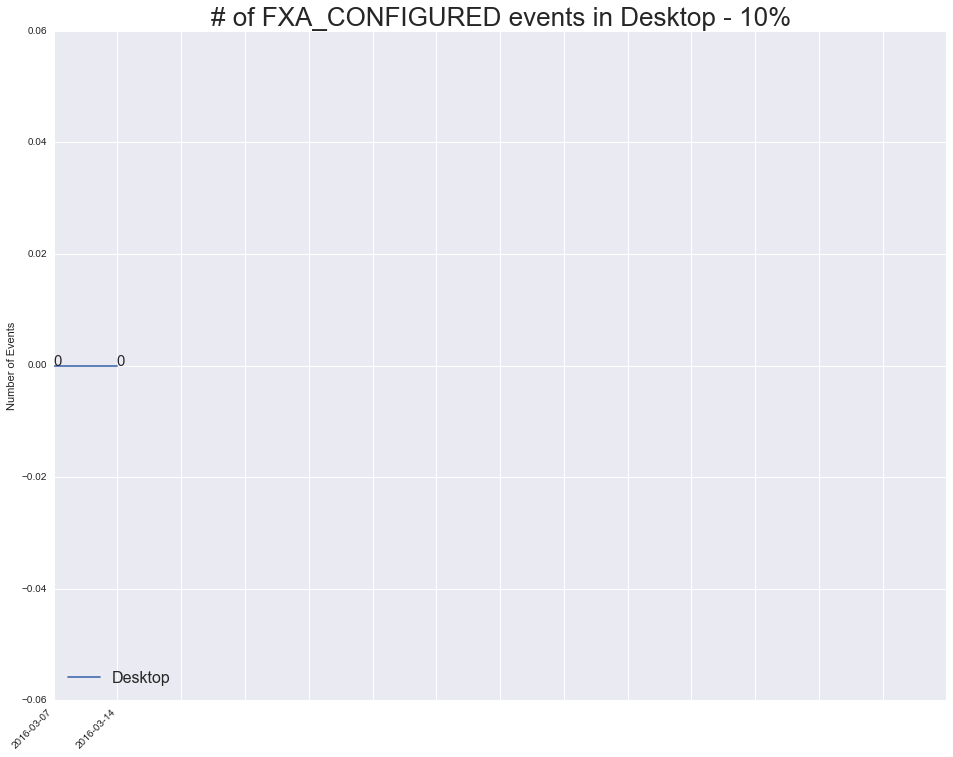

In [30]:
import seaborn
import matplotlib.pyplot as plt

print WEEKLY_DATA
fig = plt.figure(figsize=(16, 12))

plt.title(TITLE, { 'fontsize': 26 })
for item in WEEKLY_DATA:
    val = WEEKLY_DATA[item]
    plt.plot(val)
    ax = fig.add_subplot(111)
    for x,y in zip(range(15), val):
        ax.annotate('%s' %y, xy=(x,y), size=15)

plt.ylabel('Number of Events')
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xticks(range(15), WEEKS)
plt.legend(WEEKLY_DATA.keys(), loc='lower left', prop={'size': 16})


#plt.ylim(-10, 110)
plt.show()